# Descenso por Gradiente y Regresión Lineal



En este Notebook vamos a profundizar en la implementación de dos conceptos fundamentales del aprendizaje automático y la inteligecnia artificial: El descenso por gradiente o gradient descent, y la regresión lineal. El objetivo de este notebook es desarrollar una intuición de cómo funcionan estos métodos en la práctica y de su implementación usando librerías ampliamemnte usadas en la industria.

## Parte 1: Descenso por Gradiente (Gradient Descent)



El descenso por gradiente es una técnica ampliamente utilizada para resolver problemas de optimización cuya solución analítica resulta compleja o impráctica. Este algoritmo permite encontrar soluciones aproximadas de forma eficiente, especialmente en contextos donde la función objetivo depende de una gran cantidad de parámetros.

El objetivo principal del algoritmo es encontrar el valor mínimo de una función, evaluando su gradiente en distintos puntos y desplazándose en la dirección opuesta a dicho gradiente, que indica el camino de mayor descenso de la función.

En problemas típicos de aprendizaje automático, la función de costo suele depender de muchos parámetros, ya que la dimensionalidad está determinada por la cantidad de características (features) de los datos. Esta alta dimensionalidad hace que encontrar soluciones analíticas sea computacionalmente costoso o incluso inviable. Por esta razón, recurrimos al descenso por gradiente como una herramienta eficiente y escalable para entrenar modelos.

A continuación implementamos el descenso por grdiente en una y en dos dimensiones con el fin de poder visualizar cómo funciona el algoritmo.

**Descenso por gradiente en una dimensión**

Recordemos que una función $J$ en una dimensión es una función que depende únicamente de una variable independiente, es decir, $J = J(w)$.

El objetivo del descenso por gradiente es encontrar el mínimo de esta función de forma iterativa.
En cada paso, actualizamos el parámetro $w$ en la dirección opuesta al gradiente de la función:

$$
w_t \to w_{t+1}=w_{t}-\alpha\frac{d J}{d w}(w_t)
$$

Con:

- $w_t$ es el valor del parámetro en la iteración $t$,

- $\alpha$ es la tasa de aprendizaje (learning rate),

- $\frac{dJ}{dw}(w_t)$ es la derivada de la función de costo en el punto actual.

¡Observemos cómo se ve esto gráficamente!

In [1]:
# Importamos las librerías necesarias

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import jax 
import jax.numpy as jnp
import time 

In [2]:
def descenso_gradiente_1D(J, w_min, w_max, num_iteraciones, alpha=0.001, semilla=None):
    """
    Implementa el algoritmo de descenso por gradiente en una dimensión para encontrar 
    el valor óptimo del parámetro w que minimiza una función de costo J(w).

    Parámetros:
    J (función): Función de costo que se desea minimizar.
    w_min (float): Límite inferior del intervalo de búsqueda para el parámetro w.
    w_max (float): Límite superior del intervalo de búsqueda para el parámetro w.
    num_iteraciones (int): Número máximo de iteraciones del algoritmo.
    alpha (float): Tasa de aprendizaje (learning rate).
    semilla (int, opcional): Valor de semilla para reproducibilidad.

    Retorna:
    w_t (float): Valor del parámetro que minimiza la función de costo.
    """
    if semilla is not None:
        np.random.seed(semilla)

    w_vals = np.linspace(w_min, w_max, 100)   # Eje horizontal para visualización
    w_0 = np.random.uniform(w_min, w_max)     # Inicialización aleatoria del parámetro
    w_t = w_0                                 # Inicialización del parámetro optimizado
    fig, ax = plt.subplots()
    grad_J = jax.grad(J)                      # Derivada de la función de costo

    for t in range(num_iteraciones):
        # Paso de descenso por gradiente
        w_t = w_t - alpha * grad_J(w_t)

        # Asegurar que w_t permanezca dentro del intervalo válido
        w_t = np.clip(w_t, w_min, w_max)

        # Visualización del progreso
        ax.cla()
        plt.grid()
        ax.plot(w_vals, J(w_vals), label=r'$J(w)$')
        ax.plot([w_t], [J(w_t)], marker='o', color='red', label=r'$J(w_t)$')
        ax.legend(loc='upper right')
        ax.set_title(f"Iteración {t+1}/{num_iteraciones}")
        plt.xlabel(r'$w$')
        plt.ylabel(r'$J(w)$')
        clear_output(wait=True)
        display(fig)
        time.sleep(0.3)

        # Parada temprana si el gradiente es pequeño
        if abs(grad_J(w_t)) < 1e-6:
            print(f"Convergencia alcanzada en la iteración {t+1}")
            break

    return w_t


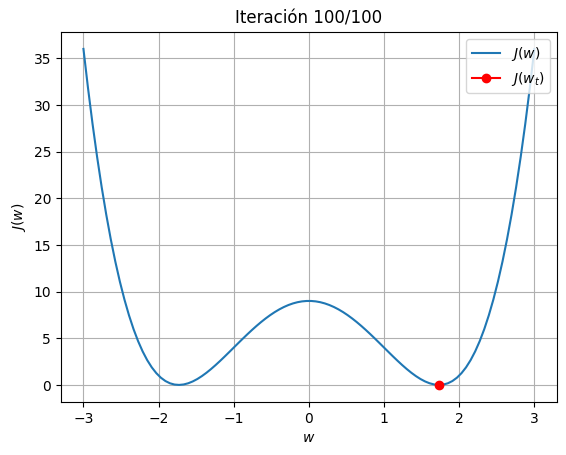

np.float32(1.7320507)

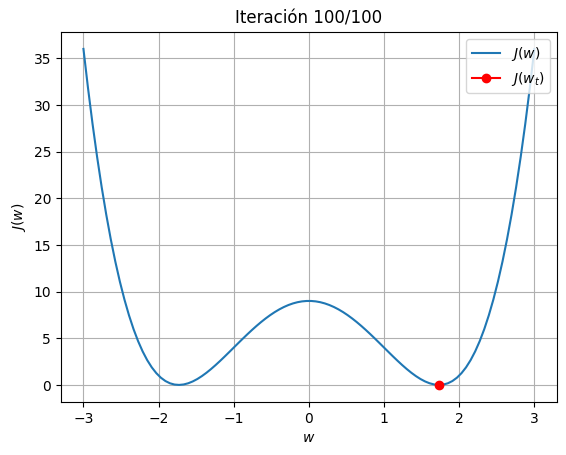

In [3]:
def J(w):
    return (3 - w ** 2) ** 2 

descenso_gradiente_1D(J, -3., 3., 100, 0.01)


Recordemos que una función $J$ en dos dimensiones es una función que depende de dos variables independientes, es decir, $J = J(w_1, w_2)$.

El objetivo del descenso por gradiente es encontrar el mínimo de esta función de manera iterativa. En cada paso, actualizamos **ambos parámetros** $(w_1, w_2)$ en la dirección opuesta al gradiente de la función:

$$
\begin{bmatrix}
w_1^{(t+1)} \\
w_2^{(t+1)}
\end{bmatrix}
=
\begin{bmatrix}
w_1^{(t)} \\
w_2^{(t)}
\end{bmatrix}
-
\alpha
\begin{bmatrix}
\frac{\partial J}{\partial w_1}(w_1^{(t)}, w_2^{(t)}) \\
\frac{\partial J}{\partial w_2}(w_1^{(t)}, w_2^{(t)})
\end{bmatrix},
$$
el cual también se puede escribir de forma más compacta como

$$
\vec{w}^{(t)}\to \vec{w}^{(t+1)} = \vec{w}^{(t)}-\alpha \nabla J(\vec{w}^{(t)})\;\;\; ,\;\;\; \vec{w}^{(t)} =  \begin{bmatrix}
w_1^{(t)} \\
w_2^{(t)}
\end{bmatrix} \;\;\;,\;\;\; \nabla = \begin{bmatrix} \frac{\partial}{\partial w_1} \\ \frac{\partial}{\partial w_{2}}\end{bmatrix}
$$

Donde:
- $w_1^{(t)}, w_2^{(t)}$ son los valores de los parámetros en la iteración $t$  
- $\alpha$ es la **tasa de aprendizaje** (*learning rate*)  
- $\frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2}$ son las **derivadas parciales** de $J$ con respecto a cada parámetro

Esta formulación nos permite minimizar funciones de costo que dependen de varios parámetros —una situación común en modelos como la regresión lineal multivariable y las redes neuronales.

In [4]:
def descenso_gradiente_2D(J, w_min, w_max, num_iteraciones, alpha=0.01, semilla=None):
    """
    Implementa el descenso por gradiente en dos dimensiones para minimizar una función de costo J(w1, w2),
    con visualización 3D del proceso.

    Parámetros:
        J (función): Función de costo a minimizar, debe aceptar dos argumentos.
        w_min (list): Límites inferiores del dominio [w1_min, w2_min].
        w_max (list): Límites superiores del dominio [w1_max, w2_max].
        num_iteraciones (int): Número máximo de iteraciones.
        alpha (float): Tasa de aprendizaje.
        semilla (int, opcional): Valor de semilla para reproducibilidad.

    Retorna:
        w_t (ndarray): Coordenadas aproximadas del mínimo.
        J(w_t) (float): Valor de la función de costo en el punto mínimo.
    """
    if semilla is not None:
        np.random.seed(semilla)

    # Inicialización aleatoria dentro del dominio
    w_0 = [np.random.uniform(w_min[0], w_max[0]), np.random.uniform(w_min[1], w_max[1])]
    w_t = np.array(w_0)

    # Derivadas parciales respecto a cada parámetro
    grad_J = [jax.grad(J, argnums=i) for i in range(2)]

    # Crear malla para visualización 3D
    w1_vals = np.linspace(w_min[0], w_max[0], 100)
    w2_vals = np.linspace(w_min[1], w_max[1], 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    J_vals = np.array(J(W1, W2))

    # Inicializar el gráfico 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for t in range(num_iteraciones):
        # Calcular gradiente
        gradiente = np.array([grad_J[k](w_t[0], w_t[1]) for k in range(2)])
        # Actualizar parámetros
        w_t = w_t - alpha * gradiente
        # Limitar dentro del dominio válido
        w_t = np.clip(w_t, w_min, w_max)

        # Visualización del descenso
        ax.cla()
        ax.plot_surface(W1, W2, J_vals, cmap='viridis', alpha=0.8, edgecolor='none')
        ax.scatter(w_t[0], w_t[1], J(w_t[0], w_t[1]), color='red', s=50, label=f'Iteración {t+1}/{num_iteraciones}')

        ax.set_title(f"Iteración {t+1} del Descenso por Gradiente")
        ax.set_xlabel(r'$w_1$')
        ax.set_ylabel(r'$w_2$')
        ax.set_zlabel(r'$J(w_1, w_2)$')
        ax.legend(loc='upper left')

        clear_output(wait=True)
        display(fig)
        time.sleep(0.3)

        if abs(gradiente[0]) < 1e-6 and abs(gradiente[1]) < 1e-6:
            print(f"Convergencia alcanzada en la iteración {t+1}")
            break

    plt.show()
    return w_t, J(w_t[0], w_t[1])


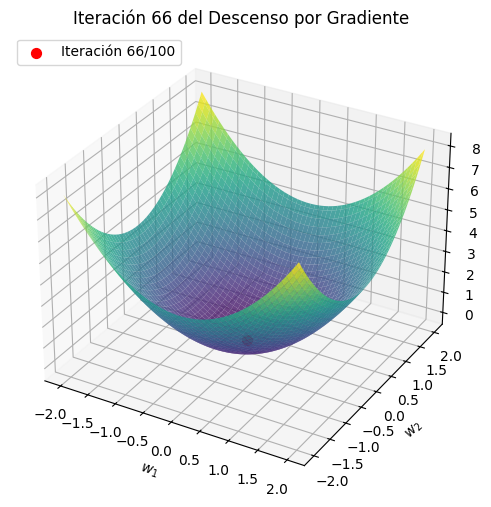

Convergencia alcanzada en la iteración 66


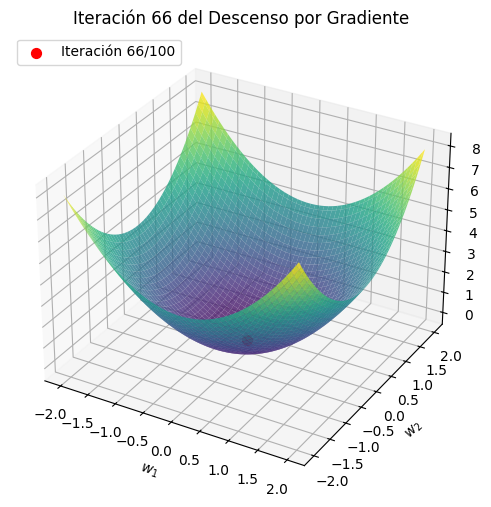

(array([ 2.59319060e-07, -3.70883368e-07]), np.float64(2.0480084732231925e-13))

In [5]:
def J_2(w_1, w_2):
    return w_1 ** 2 + w_2 ** 2

descenso_gradiente_2D(J_2, [-2., -2.], [2., 2.], 100, 0.1)

## Parte 2: Regresión Lineal

La regresión lineal es uno de los modelos más fundamentales en aprendizaje automático. Su objetivo es encontrar una relación lineal entre una variable de entrada (o varias) y una variable de salida o respuesta.

En el caso más simple (una sola característica), el modelo se puede expresar como:

$$
\hat{y} = w x + b
$$

donde:

- $x$ es la variable de entrada (feature),
- $w$ es el peso (pendiente) del modelo,
- $b$ es el sesgo o término independiente (intercepto),
- $\hat{y}$ es la predicción del modelo.

Para encontrar los valores óptimos de $w$ y $b$, usamos una **función de costo** que mida qué tan bien se ajusta el modelo a los datos. Usualmente, empleamos el **error cuadrático medio (MSE)**:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m (w x^{(i)} + b - y^{(i)})^2
$$

donde $m$ es el número de muestras.

El MSE calcula el promedio del cuadrado de las diferencias entre las predicciones $\hat{y}^{(i)} = w x^{(i)} + b$ y los valores reales $y^{(i)}$.  
Es decir, mide qué tan lejos están los puntos respecto a la recta ajustada por el modelo.  **Nuestro objetivo es minimizar esta distancia promedio.**

Esta función de costo es una **parábola convexa** en términos de $w$ y $b$, lo cual garantiza que tiene un único mínimo global.


Aunque es posible encontrar los parámetros óptimos analíticamente en regresión lineal en una dimensión, el método del **descenso por gradiente** nos permite generalizar fácilmente a modelos más complejos, como regresión lineal en varias variables, regresión polinómica, y redes neuronales.

El descenso por gradiente nos permite minimizar $J(w, b)$ de manera iterativa, actualizando los parámetros en la dirección opuesta a su gradiente:

$$
\begin{aligned}
w_{t+1} &= w_t - \alpha \, \frac{\partial J}{\partial w}(w_t, b_t) \\\\
b_{t+1} &= b_t - \alpha \, \frac{\partial J}{\partial b}(w_t, b_t)
\end{aligned}
$$

A continuación implementaremos desde cero un modelo de regresión lineal simple y lo entrenaremos con descenso por gradiente. Además, visualizaremos cómo se comporta la función de costo durante el entrenamiento y cómo se ajusta la recta a los datos.


In [6]:
# Importamos librerías necesarias

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [7]:
class RegresionLinealSimple:
    """
    Modelo de regresión lineal simple implementado desde cero utilizando descenso por gradiente.

    Atributos:
        w (float): Peso (pendiente) del modelo.
        b (float): Sesgo (intercepto) del modelo.
        x_min (float): Mínimo de la característica de entrada.
        x_max (float): Máximo de la característica de entrada.
        y_min (float): Mínimo del objetivo.
        y_max (float): Máximo del objetivo.
    """

    def __init__(self):
        """Inicializa todos los atributos en None."""
        self.w = None
        self.b = None
        self.x_min = None
        self.x_max = None
        self.y_min = None
        self.y_max = None

    def normalizar(self, x_train, y_train):
        """
        Normaliza x e y al rango [0, 1].

        Parámetros:
            x_train (np.ndarray): Datos de entrada.
            y_train (np.ndarray): Datos objetivo.

        Retorna:
            (x_norm, y_norm): Datos normalizados.
        """
        x_train = x_train.flatten()
        y_train = y_train.flatten()
        self.x_min, self.x_max = np.min(x_train), np.max(x_train)
        self.y_min, self.y_max = np.min(y_train), np.max(y_train)
        epsilon = 1e-8
        x_norm = (x_train - self.x_min) / (self.x_max - self.x_min + epsilon)
        y_norm = (y_train - self.y_min) / (self.y_max - self.y_min + epsilon)
        return x_norm, y_norm

    def funcion_costo(self, w, b, x_train, y_train):
        """Calcula el error cuadrático medio."""
        return (1 / 2) * np.mean((w * x_train + b - y_train) ** 2)

    def entrenar(self, x_train, y_train, alpha, w_0=0., b_0=0., iter=10000):
        """
        Entrena el modelo usando descenso por gradiente.

        Parámetros:
            alpha (float): Tasa de aprendizaje.
            w_0, b_0 (float): Inicializaciones.
            iter (int): Iteraciones.

        Retorna:
            (w, b): Parámetros entrenados en escala original.
        """
        x_train, y_train = self.normalizar(x_train, y_train)
        w = w_0
        b = b_0
        m = x_train.shape[0]
        for _ in range(iter):
            predicciones = w * x_train + b
            errores = predicciones - y_train
            dw = (1 / m) * np.dot(errores, x_train)
            db = np.mean(errores)
            w -= alpha * dw
            b -= alpha * db
        x_scale = self.x_max - self.x_min
        y_scale = self.y_max - self.y_min
        self.w = w * (y_scale / x_scale)
        self.b = (b * y_scale) + self.y_min - self.w * self.x_min
        return self.w, self.b

    def curva_aprendizaje(self, alpha_min, alpha_max, x_train, y_train, iter=1000):
        """
        Muestra la evolución del costo para distintas tasas de aprendizaje.

        Parámetros:
            alpha_min, alpha_max (float): Rangos de tasas de aprendizaje.
            x_train, y_train (np.ndarray): Datos de entrenamiento.
        """
        x_train, y_train = self.normalizar(x_train, y_train)
        alphas = np.linspace(alpha_min, alpha_max, 4)
        m = x_train.shape[0]
        for alpha in alphas:
            w = 0.
            b = 0.
            costos = []
            for _ in range(iter):
                predicciones = w * x_train + b
                errores = predicciones - y_train
                dw = (1 / m) * np.dot(errores, x_train)
                db = np.mean(errores)
                w -= alpha * dw
                b -= alpha * db
                costos.append(self.funcion_costo(w, b, x_train, y_train))
            plt.plot(range(iter), costos, label=f"alpha={alpha:.2e}")
        plt.xlabel("Iteraciones")
        plt.ylabel("Función de costo")
        plt.title("Curvas de aprendizaje para distintas tasas de aprendizaje")
        plt.legend()
        plt.grid(True)
        plt.show()

    def entrenar_y_graficar(self, x_train, y_train, alpha):
        """
        Entrena el modelo y grafica la recta ajustada.

        Parámetros:
            x_train, y_train (np.ndarray): Datos.
            alpha (float): Tasa de aprendizaje.
        """
        w, b = self.entrenar(x_train, y_train, alpha)
        y_pred = w * x_train + b
        plt.plot(x_train, y_train, 'o', label='Datos', color='blue')
        plt.plot(x_train, y_pred, '-', label='Recta ajustada', color='black')
        plt.legend()
        plt.grid(True)
        plt.show()

    def predecir(self, x):
        """
        Realiza predicciones usando los parámetros entrenados.

        Parámetros:
            x (np.ndarray): Entrada.

        Retorna:
            np.ndarray: Predicciones.
        """
        x = x.flatten()
        return self.w * x + self.b


In [8]:
# Generación de un conjunto de datos sintético para regresión lineal.
# Se genera una variable independiente (1 característica) y una variable objetivo.
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

# División de los datos en conjunto de entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


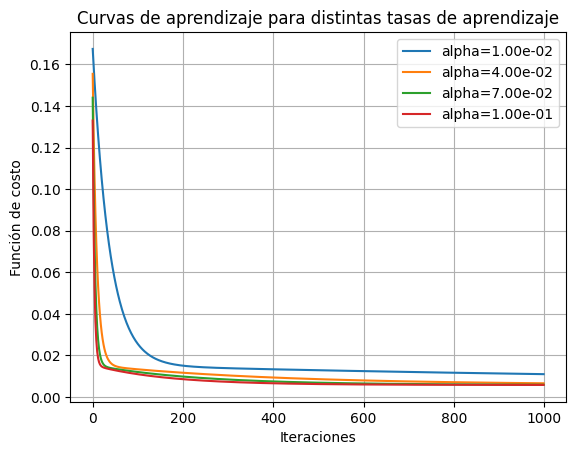

In [9]:
mi_modelo = RegresionLinealSimple() # Creamos una instancia del modelo
mi_modelo.curva_aprendizaje(0.01, 0.1, X_train, y_train) # Graficamos la curva de aprendizaje

Los parámetros del modelo son w=49.250 b=0.298.


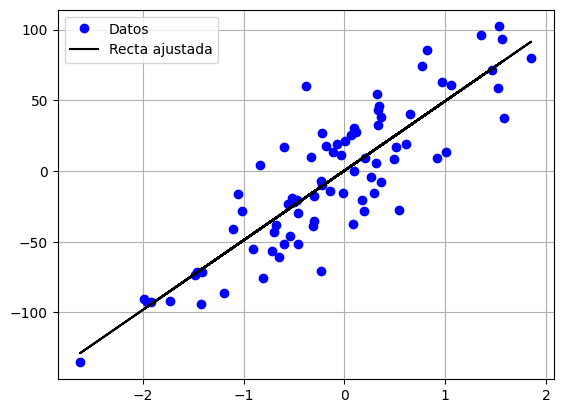

In [10]:
mi_modelo.entrenar(X_train, y_train, 0.1) # Entrenamiento del modelo con tasa de aprendizaje 0.1
print(f'Los parámetros del modelo son w={mi_modelo.w:.3f} b={mi_modelo.b:.3f}.')
mi_modelo.entrenar_y_graficar(X_train, y_train, 0.1) # Entrenamiento y graficación de la recta ajustada

In [11]:
mi_pred_y = mi_modelo.predecir(X_test) # Realizamos predicciones en el conjunto de prueba
mi_error = np.sqrt(mean_squared_error(y_test, mi_pred_y))  # Calculamos el error cuadrático medio en el conjunto de prueba
print(f'El error cuadrático medio de nuestro modelo en el conjunto de prueba es {mi_error:.3f}.') 

El error cuadrático medio de nuestro modelo en el conjunto de prueba es 30.624.


Ahora implementamos una regresión lineal de una librería usada ampliamente llamada `scikit-learn` y comparamos su desempeño con el desempeño de nuestra regresión hecha en casa.

In [12]:
modelo_sklearn = LinearRegression() # Crear una instancia del modelo de regresión lineal de sklearn.
modelo_sklearn.fit(X_train, y_train) # Train the model.
y_pred = modelo_sklearn.predict(X_test) # Make predictions.
print(f'Los parámetros del modelo de scikit-learn son w={modelo_sklearn.coef_[0]:.3f} b={modelo_sklearn.intercept_:.3f}.')

Los parámetros del modelo de scikit-learn son w=49.250 b=0.298.


In [13]:
sklear_error = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculamos el error cuadrático medio del modelo de scikit-learn.
print(f'El error cuadrático medio del modelo de scikit-learn es {sklear_error:.3f}.')    

El error cuadrático medio del modelo de scikit-learn es 30.624.


1. ¿Cuál es la motivación principal para usar el descenso por gradiente en lugar de una solución analítica?
2. ¿Qué representa el parámetro $\alpha$ en el algoritmo de descenso por gradiente?
3. ¿Por qué se usa el error cuadrático medio como función de costo en regresión lineal?
4. ¿Qué significa que una función sea convexa en el contexto de optimización?
5. En el algoritmo de descenso por gradiente, ¿qué ocurre si la tasa de aprendizaje $\alpha$ es demasiado grande?
6. ¿Cuál es la diferencia entre el descenso por gradiente en una dimensión y en dos dimensiones?
7. ¿Qué efecto tiene la normalización de los datos en el entrenamiento del modelo?
8. ¿Cuál es el propósito de comparar distintas tasas de aprendizaje en las curvas de aprendizaje?